# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


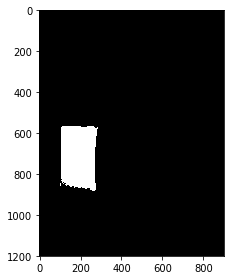

In [3]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np

image = io.imread("testbilder/1_test.jpg")
schwellwert = [104,22,43]
bereich = 35

count_rows = image.shape[0]
count_collumns = image.shape[1]

new_image = np.empty_like(image)

for x in range(count_rows):
    for y in range(count_collumns):
        pixel = image[x][y]
        
        isRCase = (schwellwert[0] - bereich) < pixel[0] < (schwellwert[0] + bereich)
        isGCase = (schwellwert[1] - bereich) < pixel[1] < (schwellwert[1] + bereich)
        isBCase = (schwellwert[2] - bereich) < pixel[2] < (schwellwert[2] + bereich)
        if isRCase and isGCase and isBCase:
            new_image[x][y] = np.array([255,255,255])
        else:
            new_image[x][y] = np.array([0,0,0])

new_image[40][1] = np.array([0,0,0])
io.imshow(new_image)
io.imsave("1_klein.jpg",new_image)


## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

test
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(120, 285, 563, 881)
120 285 563 881
done


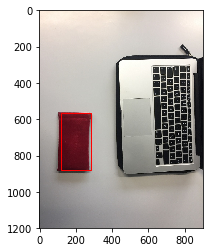

In [25]:
%matplotlib inline 
from skimage import io,color
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import os
import warnings; warnings.simplefilter('ignore')
import math
IMAGES_PER_ROW = 4

image = io.imread("1_klein.jpg")
print("test")

def erosion (image):
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    white=np.array([255,255,255])
    black=np.array([0,0,0])

    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                zahl=0
                for i in range(4):
                    if np.array_equal(kernel[i],white):
                        zahl+=1
                if (zahl<1):
                    image[x][y] = np.array(black)

    io.imsave("1_klein_erosion.jpg",image)
    return(image)



def dilate (image):
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    white=np.array([255,255,255])
    black=np.array([0,0,0])

    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                zahl=0
                for i in range(4):
                    if np.array_equal(kernel[i],white):
                        zahl+=1
                if (zahl>=1):
                    image[x][y] = np.array(white)
    io.imsave("1_klein_dilate.jpg",image)
    return(image)
    
    

def components(image):
    count_rows = image.shape[0]
    count_collumns = image.shape[1]
    
    matrix=np.zeros((count_collumns, count_rows),int)
    print(matrix)
            
    white=np.array([255,255,255])
    black=np.array([0,0,0])
    up=0
    down=0
    left=0
    right=0
    
    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            if np.array_equal(pixel,white):
                if (up==0) and (down==0) and (left==0) and (right==0):
                    up=y
                    down=y
                    left=x
                    right=x
                #when you look through the pixels like this, the upper pixel is found first. so up did not need to set again
                if y>down:
                    down=y
                if x<left:
                    left=x
                if x>right:
                    right=x
                    
                #print(pixel)
                matrix[x][y]=1 #comp_number
               # print(matrix[x][y])
    #print(up,down,left,right)
    return(up,down,left,right)


def bounding_box(image):
    #for i in range(50):
        #print("hi")
        #image = erosion(image)
    #io.imshow("1_klein_erosion.jpg")
    #image = io.imread("1_klein_erosion.jpg")
    #for i in range(50):
       #print("ho")
        #image = dilate(image)
    #io.imshow("1_klein_dilate.jpg")
    image= io.imread("1_klein_dilate.jpg")
    return(components(image))
    
    
def drawROI(image, x, y, width, height, out = plt):
    currentAxis = plt.gca()
    currentAxis.add_patch(
        patches.Rectangle(
            (x, y),
            width,
            height,
            fill=False,
            edgecolor="red"
        )
    )
    
    plt.imshow(image)
    plt.imsave("1_klein_box.jpg",image)

    
box =bounding_box(image)
print(box)
up=box[0]
down=box[1]
left=box[2]
right=box[3]
print(up,down,left,right)

image = io.imread("testbilder/1_test.jpg")
drawROI(image, up, left,(down-up),(right-left))


print("done")
        
            
        
                                     




## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)